In [2]:
import pandas as pd
import numpy as np

# Load the data
data_fall = pd.read_csv('output-fall.csv', nrows=3000)
data_nofall = pd.read_csv('output-nofall.csv', nrows=3000)

print(data_fall.shape)
print(data_nofall.shape)


(3000, 22222)
(3000, 22222)


In [3]:
# Concatenate the dataframes
df = pd.concat([data_fall, data_nofall], ignore_index=True)
df.head()


,report_id,ingredient_7012693.0,ingredient_5006590.0,ingredient_5009117.0,ingredient_7005806.0,ingredient_5012068.0,ingredient_5005829.0,ingredient_5014237.0,ingredient_5004299.0,ingredient_13116.0,...,ingredient_13325.0,ingredient_7012908.0,ingredient_5005800.0,ingredient_5006975.0,ingredient_8500.0,ingredient_7004692.0,ingredient_7006003.0,ingredient_5008717.0,ingredient_19165.0,target
0,63894.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,70502.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,77514.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,79112.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,89778.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# shuffle and split the data
from sklearn.model_selection import StratifiedShuffleSplit

x = df.drop(columns=['report_id', 'target'])
y = df['target']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Logistic Regression with L1 regularization:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       600
           1       0.91      1.00      0.95       600

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



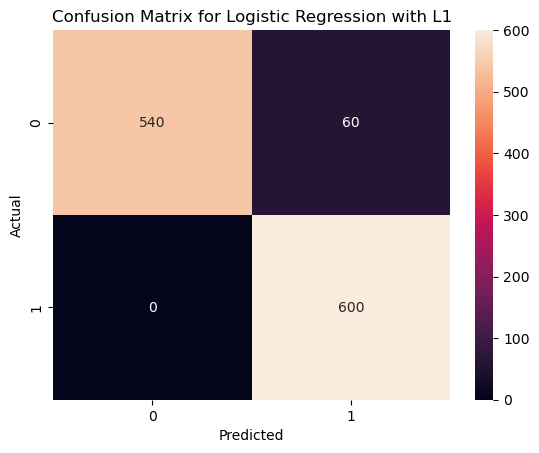

In [5]:
# logistic regression with l1 regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# logistic regression with l1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(x_train, y_train)
# predict and evaluate
y_pred = logreg.predict(x_test)
print('Logistic Regression with L1 regularization:')
print(classification_report(y_test, y_pred))

# plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with L1')
plt.show()


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       600
           1       0.95      1.00      0.98       600

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



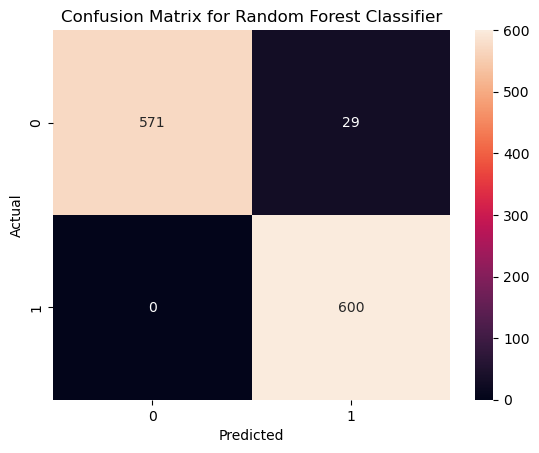

In [6]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)
# predict and evaluate
y_pred = random_forest.predict(x_test)
print('Random Forest Classifier:')
print(classification_report(y_test, y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [7]:
importances = random_forest.feature_importances_
feature_names = x.columns
sorted_importances = sorted(zip(importances, feature_names), reverse=True)
print(sorted_importances[:10])  # Top 10 most important features


[(0.03328715852958612, 'ingredient_6618.0'), (0.03284627146935127, 'ingredient_6006384.0'), (0.02958443001099735, 'ingredient_6000564.0'), (0.027620291913724167, 'ingredient_8450.0'), (0.027471256536365618, 'ingredient_5009792.0'), (0.02331508198805752, 'ingredient_5002839.0'), (0.021458171930191786, 'ingredient_9418.0'), (0.008310012981903708, 'ingredient_5015477.0'), (0.006493105908802912, 'ingredient_10134.0'), (0.005890469101896148, 'ingredient_9118.0')]


In [10]:
# extract the ingredient id from the ingredient name for the top 10 most important features
top_10_features = [feature_name for importance, feature_name in sorted_importances[:10]]
ingredient_ids = [int(float(feature.split('_')[-1])) for feature in top_10_features if feature.split('_')[-1].replace('.', '', 1).isdigit()]
print('Ingredient IDs for the top 10 most important features:')
print(ingredient_ids)


Ingredient IDs for the top 10 most important features:
[6618, 6006384, 6000564, 8450, 5009792, 5002839, 9418, 5015477, 10134, 9118]


In [7]:
from sklearn.inspection import plot_partial_dependence

features = [0,1]

# Create PDP plots
fig, ax = plt.subplots(figsize=(12, 8))  # Create a plot of suitable size
plot_partial_dependence(random_forest, x_train, features, ax=ax, grid_resolution=50)

plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjusting space for title
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (c:\Users\lou22\anaconda3\Lib\site-packages\sklearn\inspection\__init__.py)

c:\Users\lou22\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:51:24] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       600
           1       0.86      1.00      0.93       600

    accuracy                           0.92      1200
   macro avg       0.93      0.92      0.92      1200
weighted avg       0.93      0.92      0.92      1200



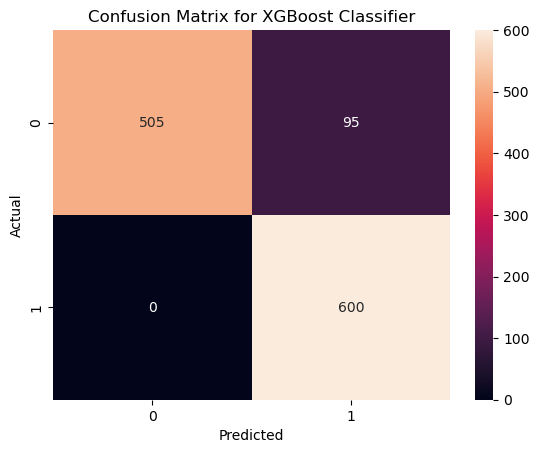

In [8]:
# xgboost classifier
import xgboost as xgb
xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(x_train, y_train)

# predict and evaluate
y_pred = xgboost_model.predict(x_test)
print('XGBoost Classifier:')
print(classification_report(y_test, y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()


SVM Classifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       600
           1       0.95      1.00      0.98       600

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



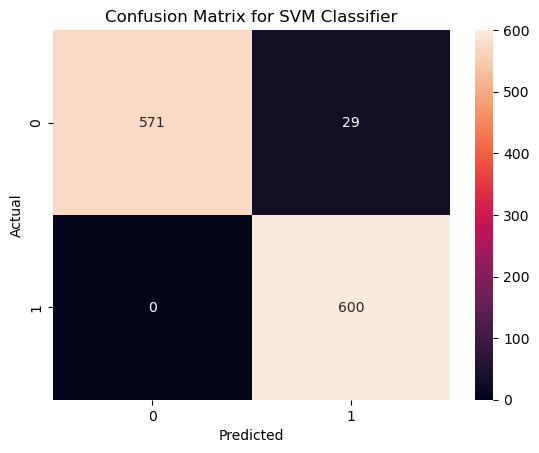

In [9]:
# svm
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
# predict and evaluate
y_pred = svm_model.predict(x_test)
print('SVM Classifier:')
print(classification_report(y_test, y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()



MLP Classifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       600
           1       0.96      1.00      0.98       600

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



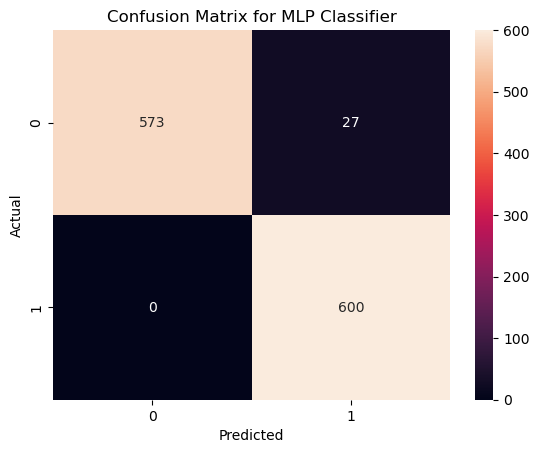

In [10]:
# simple MLP classifier
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(x_train, y_train)
# predict and evaluate
y_pred = mlp_model.predict(x_test)  
print('MLP Classifier:')
print(classification_report(y_test, y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()


[(0.03328715852958612, 'ingredient_6618.0'), (0.03284627146935127, 'ingredient_6006384.0'), (0.02958443001099735, 'ingredient_6000564.0'), (0.027620291913724167, 'ingredient_8450.0'), (0.027471256536365618, 'ingredient_5009792.0'), (0.02331508198805752, 'ingredient_5002839.0'), (0.021458171930191786, 'ingredient_9418.0'), (0.008310012981903708, 'ingredient_5015477.0'), (0.006493105908802912, 'ingredient_10134.0'), (0.005890469101896148, 'ingredient_9118.0')]


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 1066809270744648613990733123296419655154574050344438857728.000000, while the model output was 0.860000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
# pickle the random forest model
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

# pickle the shap explainer
with open('shap_explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

# pickle the feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

